In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# Load dataset
df = pd.read_csv("../data/filtered_data.csv")

In [2]:
from imblearn.over_sampling import SMOTE

# X: features, y : target 
X = df.drop('Churn', axis=1)
y = df['Churn']

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


print("Before SMOTE:")
print(y.value_counts())

print("\nAfter SMOTE:")
print(y_smote.value_counts())

Before SMOTE:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

After SMOTE:
Churn
0.0    5174
1.0    5174
Name: count, dtype: int64


/Users/kocak/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
# New Dataframe
df_resampled = pd.concat([X_smote, y_smote], axis=1)

# Saving as CSV
df_resampled.to_csv("../data/resampled_datas/resampled_smote.csv", index=False)

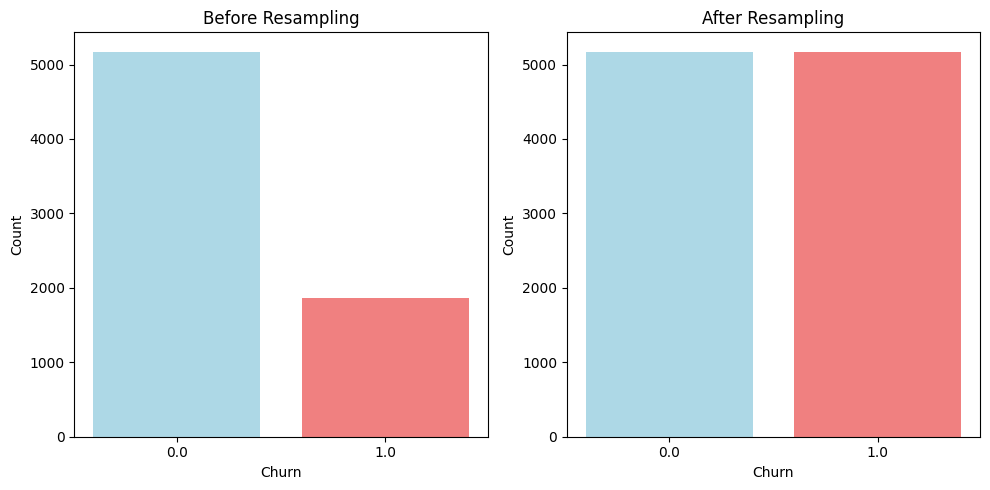

In [4]:
before_counts = y.value_counts().sort_index()
after_counts = y_smote.value_counts().sort_index()

before_colors = ['lightblue' if label == 0 else 'lightcoral' for label in before_counts.index]
after_colors = ['lightblue' if label == 0 else 'lightcoral' for label in after_counts.index]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Before
ax[0].bar(before_counts.index.astype(str), before_counts.values, color=before_colors)
ax[0].set_title("Before Resampling")
ax[0].set_xlabel("Churn")
ax[0].set_ylabel("Count")

# After
ax[1].bar(after_counts.index.astype(str), after_counts.values, color=after_colors)
ax[1].set_title("After Resampling")
ax[1].set_xlabel("Churn")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()